In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import os
%matplotlib inline

from IPython.display import display, HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
working_dir = r'../../../outputs/agg'
pd.options.display.float_format = '{:0,.0f}'.format
format_percent = "{:,.2%}".format

In [3]:
def load_data(fname):
    """ open and join model and survey data """

    df_model = pd.read_csv(os.path.join(working_dir,fname+'.csv'))
    df_model['source'] = 'model'
    df_survey = pd.read_csv(os.path.join(working_dir,'survey',fname+'.csv'))
    df_survey['source'] = 'survey'
    df = df_model.append(df_survey)

    return df

# Total Persons

In [4]:
df = load_data('person_type')
df.groupby('source').sum()[['psexpfac']].T

source,model,survey
psexpfac,"4,040,013","3,871,774"


# Total Households

In [5]:
df = load_data('household_size_vehs_workers')
df.groupby('source').sum()[['hhexpfac']].T

source,model,survey
hhexpfac,"1,605,263","1,655,733"


# Total Trips

In [6]:
df = load_data('trip_purpose_mode')
df.groupby('source').sum()[['trexpfac']].T

source,model,survey
trexpfac,"16,497,106","18,448,721"


# Total Tours

In [7]:
df = load_data('tour_purpose_mode')
df.groupby('source').sum()[['toexpfac']].T

source,model,survey
toexpfac,"6,476,960","6,725,118"


## Average Household Size

In [8]:
pd.options.display.float_format = '{:0,.2f}'.format
df = load_data('household_size_vehs_workers')
pd.DataFrame(
    df.groupby('source').apply(
        lambda row: ((row['hhsize']*1.0*row['hhexpfac']*1.0).sum())/row['hhexpfac'].sum()*1.0),
        columns=['avg_hh_size'])

,avg_hh_size
source,
model,2.52
survey,2.45


## Average Trips per Person

## Average Distance to Work

In [9]:
df = load_data('trip_averages')
df[df['dpurp'] == 'Work'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       5.04     33.59      0.00
           survey      4.02     26.82      0.00
HOV2       model       8.86     20.36      0.00
           survey      6.67     16.18      1.54
HOV3+      model       9.09     20.62      0.00
           survey      7.74     17.20      1.73
SOV        model       9.11     21.16      0.00
           survey      8.21     18.01      1.71
School Bus model       2.97     10.20      0.00
           survey      3.59     10.13      0.72
TNC        model       2.25      9.92      0.00
           survey      4.57     14.99      0.98
Transit    model       9.94     41.66      0.00
           survey      4.55     20.42      0.43
Walk       model       0.70     14.04      0.00
           survey      0.85     17.10      0.00

## Average Distance to School

In [10]:
df[df['dpurp'] == 'School'].groupby(['mode','source']).mean()

travdist  travtime  travcost
mode       source                              
Bike       model       3.00     19.96      0.00
           survey      2.57     17.13      0.00
HOV2       model       3.39     10.81      0.00
           survey      3.58     10.61      0.72
HOV3+      model       3.60     11.20      0.00
           survey      4.15     11.37      0.83
SOV        model       5.97     15.55      0.00
           survey      6.66     17.00      1.38
School Bus model       3.31     10.77      0.00
           survey      2.74      9.37      0.55
TNC        model       2.44      9.46      0.00
           survey      3.31     13.02      1.02
Transit    model       5.80     37.38      0.00
           survey      3.67     20.99      0.71
Walk       model       1.38     27.64      0.00
           survey      0.89     17.94      0.00

## Transit Pass Ownership

In [11]:
pd.options.display.float_format = '{:0,.0f}'.format
df = load_data('parking_transit_pass')
pd.pivot_table(df, index='ptpass',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
ptpass,,
0,"3,232,646","3,087,568"
1,"807,367","784,206"


In [12]:
pd.pivot_table(df[df['ptpass']==1], 
               index='pptyp',columns='source',values='psexpfac',aggfunc='sum')

source,model,survey
pptyp,,
Child Age 5-15,"1,685","9,796"
Full-Time Worker,"476,413","709,022"
High School Student Age 16+,"169,718","5,549"
Non-Working Adult Age 65+,358,nan
Non-Working Adult Age <65,"20,271",329
Part-Time Worker,"47,978","44,097"
University Student,"90,944","15,414"


# Auto Ownership
## By Income

In [13]:
df = load_data('auto_ownership')
taz_geog = pd.read_sql_table('taz_geography', 
                             'sqlite:///../../../inputs/db/soundcast_inputs.db') 
df = df.merge(taz_geog, left_on='hhtaz', right_on='taz')

# Define income groups
inc_bin=[-1,20000,40000,60000,75000,9999999999999]
inc_bin_labels = ['0-$20k','$20-40k','$40-60k','$60-75k','>$75k']
df['income_bin'] = pd.cut(df['hhincome_thousands'], bins=inc_bin, labels=inc_bin_labels)

df.loc[df['hhvehs'] >= 4, 'hhvehs'] = '4+'

pd.pivot_table(df, index=['hhvehs','source'], columns='income_bin', values='hhexpfac', aggfunc='sum')

income_bin     0-$20k  $20-40k  $40-60k  $60-75k   >$75k
hhvehs source                                           
0      model   49,330   25,402   14,668    6,100  18,857
       survey  55,562   12,368   15,534   17,279  20,465
1      model   97,487  114,455   93,892   57,638 165,426
       survey  93,311   31,438   71,047  110,809 160,016
2      model   22,702   48,667   67,975   55,705 345,140
       survey  16,811   30,419   55,018   77,247 371,615
3      model    6,010   13,736   25,323   24,722 215,341
       survey   3,205    8,892   10,941   22,998 177,624
4+     model    2,225    5,159    9,250    9,212 110,841
       survey     586      366      393   13,427  99,015

In [14]:
pd.options.display.float_format = "{:,.2%}".format
_df_model = pd.pivot_table(df[df['source'] == 'model'], index='hhvehs', columns='geog_name', values='hhexpfac', aggfunc='sum')
_df_model = _df_model/_df_model.sum()
_df_survey = pd.pivot_table(df[df['source'] == 'survey'], index='hhvehs', columns='geog_name', values='hhexpfac', aggfunc='sum')
_df_survey = _df_survey/_df_survey.sum()

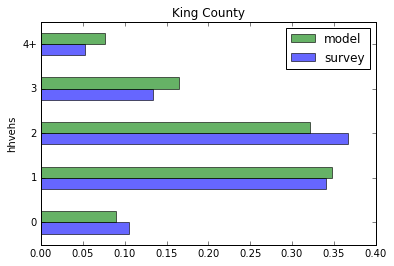

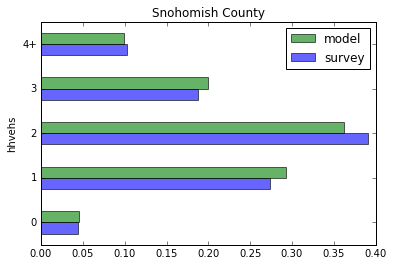

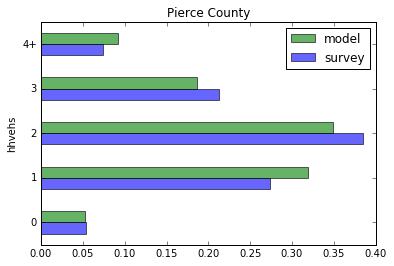

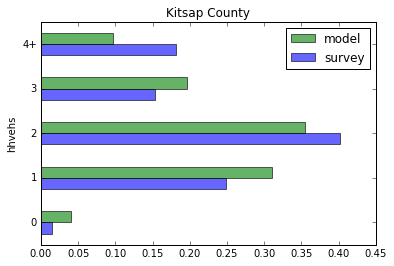

In [15]:
for county in df['geog_name'].unique():
    _df = pd.DataFrame([_df_survey[county],_df_model[county]]).T
    _df.columns = ['survey','model']
    _df.plot(kind='barh', title=county, legend='reverse', alpha=0.6)


## Total Workers by Home County
Model

In [16]:
df = load_data('work_flows')
pd.options.display.float_format = '{:0,.0f}'.format
df.rename(columns={'person_county': 'Home County', 'person_work_county':'Work County'}, inplace=True)

pd.pivot_table(df[df['source'] == 'model'], index='Home County', columns='Work County', aggfunc='sum')

psexpfac                         
Work County     King Kitsap  Pierce Snohomish
Home County                                  
King         455,039 33,533  97,540   144,430
Kitsap        16,224 23,509  53,718    99,485
Pierce        59,442 48,547 150,311   227,913
Snohomish     37,365 55,001 133,710   263,162